# upper levels plot during different flavours of La nina

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
import numpy as np
import os
import xarray as xr
import xcdat as xc
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm as BM
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as mticker
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [100]:
from scipy import stats

In [101]:
from functions import preproc_funcs as funcs

In [102]:
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 12
# Edit axes parameters
mpl.rcParams['axes.linewidth'] = 2.0
# Tick properties
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'

In [103]:
import matplotlib as m
from matplotlib.colors import BoundaryNorm as BM
import matplotlib.patches as mpatches

def plot_background(ax):
    ax.add_feature(cfeature.COASTLINE, alpha=0.9, lw=1.1)
    # ax.set_global()
    # ax.add_feature(cfeature.LAND, color='k', alpha=0.9, zorder=1)
    # ax.add_feature(cfeature.OCEAN, color='lightgray')
    gl = ax.gridlines(draw_labels=True,
                      linewidth=1, color='gray', alpha=0.01, linestyle='--')
    gl.top_labels = False
    # gl.left_labels = False
    # gl.bottom_labels = False
    gl.right_labels = False
    gl.xlines = False
    # gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k'}
    gl.ylabel_style = {'size': 10, 'color': 'k'}
    return ax


def plot_maps(x, y, z, titles, labels, cmap, levels, cbar_label = 'Precip', pval = [], nrows=1, ncols=3, figsize=(12,4), land_mask_list = [0], add_patch=False):
    fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
    
    axlist = axarr.flatten()
    
    for ax in axlist:
        plot_background(ax)
    
    for i in range(len(z)):
        axlist[i].contourf(x, y, z[i], cmap = cmap, transform = ccrs.PlateCarree(central_longitude=0), levels=levels, extend='both')
        axlist[i].set_title(titles[i])
        if i in land_mask_list:
            axlist[i].add_feature(cfeature.LAND, color = 'k', zorder=1)
        if pval != []:
            pval_plot = np.ma.masked_less_equal(pval[i], 0.05)
            axlist[i].pcolor(x, y, pval_plot, alpha = 0., hatch='////', transform = ccrs.PlateCarree(central_longitude=0))
        axlist[i].set_title(titles[i], fontdict={'fontsize':12})
        axlist[i].text(0.1, 1.05, labels[i], size=16, fontweight='bold', transform=axlist[i].transAxes)
        if add_patch:
            axlist[i].add_patch(mpatches.Rectangle(xy=[120, -65], width=170, height=20,
                                            facecolor='none', edgecolor='k',
                                            transform=ccrs.PlateCarree()))
            axlist[i].add_patch(mpatches.Rectangle(xy=[190, -5], width=80, height=10,
                                            facecolor='none', edgecolor='k',
                                            transform=ccrs.PlateCarree()))
            axlist[i].add_patch(mpatches.Rectangle(xy=[140, -5], width=30, height=10,
                                            facecolor='none', edgecolor='k',
                                            transform=ccrs.PlateCarree()))
            axlist[i].add_patch(mpatches.Rectangle(xy=[250, -30], width=40, height=20,
                                            facecolor='none', edgecolor='k',
                                            transform=ccrs.PlateCarree()))
        
    norm = BM(levels, 256, extend='both')
    fig.colorbar(m.cm.ScalarMappable(norm = norm, cmap=cmap), ax = axlist, \
                orientation = 'horizontal', shrink=0.4, aspect = 20, pad = 0.05, label = cbar_label)

In [105]:
psl = xr.open_mfdataset('./data/20CR/slp/pres.sfc.mon.mean.nc', parallel=True)
tas = xr.open_mfdataset('./data/20CR/tas/air.2m.mon.mean.nc', parallel=True)
pr = xr.open_mfdataset('./data/20CR/precip/prate.mon.mean.nc', parallel=True)
uwnd = xr.open_mfdataset('./data/20CR/wind/uwnd.hgtAbvSfc.mon.mean.nc', parallel=True)
vwnd = xr.open_mfdataset('./data/20CR/wind/vwnd.hgtAbvSfc.mon.mean.nc', parallel=True)
omega = xr.open_mfdataset('./data/20CR/wind/omega.mon.mean.nc', parallel=True)

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 0:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

In [106]:
gph = xr.open_mfdataset('./data/20CR/gph/hgt.tropo.mon.mean.nc', parallel=True)

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 0:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

In [107]:
mixed_years = np.array([1908,1910,1916,1917,1922,1949,1995])
cp_years = np.array([1903,1909,1924,1933,1938,1942,1950,1954,1955,1964,1970,1971,1973,1974,1975,1984,1988,1998,1999,2000,2007,2010,2011,2020,2022])
ep_years = np.array([1906,1962,1967,2017,2021])
neut_years = np.array([1901,1907,1912,1921,1923,1926,1927,1928,1929,1931,1932,1934,1935,1936,1943,1944,1945,1946,1947,1948,1952,1953,1958,1959,1960,1978,1980,1981,1983,1989,1990,1993,1996,2001,2008,2012,2013,2016,2019])

In [108]:
tas_anom = funcs.calc_anom(tas.air, tas.air.sel(time = slice('1960', '1990'))).sel(lat = slice(-40, 40))

In [109]:
pr_anom = funcs.calc_anom(pr.prate*86400, (pr.prate*86400).sel(time = slice('1960', '1990'))).sel(lat = slice(-40, 40))

In [110]:
import regionmask

In [111]:
land_mask = regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(pr_anom)
# pr_anom_land = pr_anom.isel(mask_ocean = 1)
land_mask

<xarray.DataArray 'mask' (lat: 81, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [ 0., nan, nan, ...,  0.,  0.,  0.]])
Coordinates:
  * lat      (lat) float32 -40.0 -39.0 -38.0 -37.0 -36.0 ... 37.0 38.0 39.0 40.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

In [112]:
pr_anom_land = pr_anom.where(~np.isnan(land_mask))
tas_anom_ocean = tas_anom.where(np.isnan(land_mask))

In [113]:
def get_composite(val, season=[12,1,2], years=np.arange(1960, 1991, 1)):
    val_seasonal_mean_det = funcs.detrend_separate_check(val.where(val.time.dt.month.isin(season), drop=True).resample(time = 'AS-JUN').mean('time').chunk(dict(time=-1, lat=5, lon=10)), dim='time', period=15)
    return val_seasonal_mean_det.where(val_seasonal_mean_det.time.dt.year.isin(years), drop=True).mean('time')

In [114]:
from dask.diagnostics import ProgressBar

In [115]:
with ProgressBar():
    tas_plot_ep = get_composite(tas_anom_ocean, season=[12,1,2], years=ep_years).load()
    pr_plot_ep = get_composite(pr_anom_land, season=[12,1,2], years=ep_years).load()

[########################################] | 100% Completed | 43.40 ss
[########################################] | 100% Completed | 41.73 ss


In [ ]:
with ProgressBar():
    tas_plot_cp = get_composite(tas_anom_ocean, season=[12,1,2], years=cp_years).load()
    pr_plot_cp = get_composite(pr_anom_land, season=[12,1,2], years=cp_years).load()

[###################################     ] | 87% Completed | 25.18 sms

In [70]:
with ProgressBar():
    tas_plot_mixed = get_composite(tas_anom_ocean, season=[12,1,2], years=mixed_years).load()
    pr_plot_mixed = get_composite(pr_anom_land, season=[12,1,2], years=mixed_years).load()

[########################################] | 100% Completed | 41.54 ss
[########################################] | 100% Completed | 41.89 ss


In [71]:
with ProgressBar():
    tas_plot_neut = get_composite(tas_anom_ocean, season=[12,1,2], years=neut_years).load()
    pr_plot_neut = get_composite(pr_anom_land, season=[12,1,2], years=neut_years).load()

[########################################] | 100% Completed | 41.66 ss
[########################################] | 100% Completed | 42.31 ss


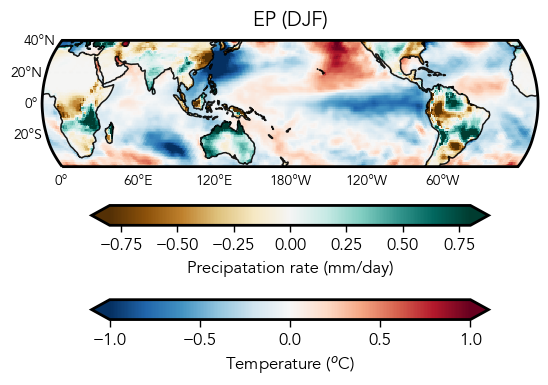

In [94]:
cbar_dict1 = dict(orientation='horizontal', shrink=0.8, label='Temperature ($^{o}$C)')
cbar_dict2 = dict(orientation='horizontal', shrink=0.8, label='Precipatation rate (mm/day)')
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
tas_plot_ep.plot(transform=ccrs.PlateCarree(), cbar_kwargs=cbar_dict1, extend='both', vmin=-1.0)
pr_plot_ep.plot(transform=ccrs.PlateCarree(), cbar_kwargs=cbar_dict2, cmap='BrBG', extend='both', vmin=-0.8)
plot_background(ax)
# ax.add_feature(cfeature.LAND, color='k', alpha=0.9, zorder=1)
ax.set_title('EP (DJF)')
plt.savefig('./images/ep_djf_tas_pr.png', dpi=300, bbox_inches='tight')

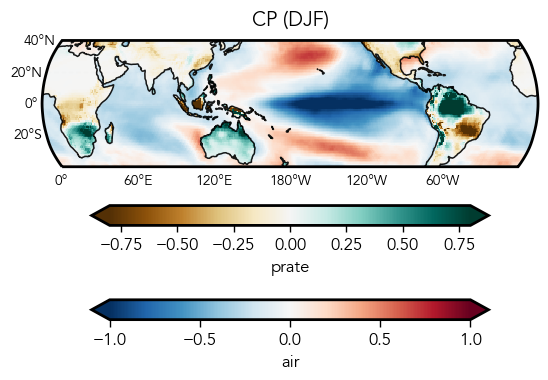

In [91]:
cbar_dict = dict(orientation='horizontal', shrink=0.8)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
tas_plot_cp.plot(transform=ccrs.PlateCarree(), cbar_kwargs=cbar_dict, extend='both', vmin=-1.0)
pr_plot_cp.plot(transform=ccrs.PlateCarree(), cbar_kwargs=cbar_dict, cmap='BrBG', extend='both', vmin=-0.8)
plot_background(ax)
# ax.add_feature(cfeature.LAND, color='k', alpha=0.9, zorder=1)
ax.set_title('CP (DJF)')
plt.savefig('./images/cp_djf_tas_pr.png', dpi=300, bbox_inches='tight')

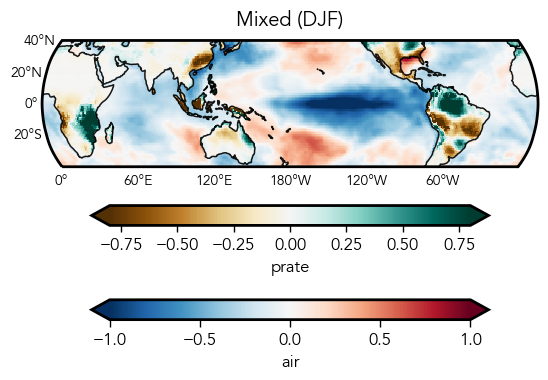

In [92]:
cbar_dict = dict(orientation='horizontal', shrink=0.8)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
tas_plot_mixed.plot(transform=ccrs.PlateCarree(), cbar_kwargs=cbar_dict, extend='both', vmin=-1.0)
pr_plot_mixed.plot(transform=ccrs.PlateCarree(), cbar_kwargs=cbar_dict, cmap='BrBG', extend='both', vmin=-0.8)
plot_background(ax)
# ax.add_feature(cfeature.LAND, color='k', alpha=0.9, zorder=1)
ax.set_title('Mixed (DJF)')
plt.savefig('./images/mixed_djf_tas_pr.png', dpi=300, bbox_inches='tight')

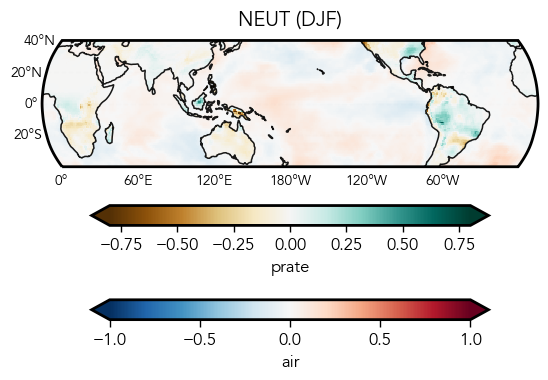

In [93]:
cbar_dict = dict(orientation='horizontal', shrink=0.8)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
tas_plot_neut.plot(transform=ccrs.PlateCarree(), cbar_kwargs=cbar_dict, extend='both', vmin=-1.0)
pr_plot_neut.plot(transform=ccrs.PlateCarree(), cbar_kwargs=cbar_dict, cmap='BrBG', extend='both', vmin=-0.8)
plot_background(ax)
# ax.add_feature(cfeature.LAND, color='k', alpha=0.9, zorder=1)
ax.set_title('NEUT (DJF)')
plt.savefig('./images/neut_djf_tas_pr.png', dpi=300, bbox_inches='tight')